<a href="https://colab.research.google.com/github/GzpTez0514/-/blob/main/Pytorch%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A004_%E5%8D%95%E5%B1%82%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# tensor实现单层神经网络的正向传播
import torch
X = torch.tensor([[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=torch.float32)
z = torch.tensor([-0.2, -0.05, -0.05, 0.1])
w = torch.tensor([-0.2, 0.15, 0.15])

def Linear(X, w):
  zhat = torch.mv(X, w)
  return zhat

zhat = Linear(X, w)
print(z)
print(zhat)
print(z == zhat)

SSE = sum((zhat - z) ** 2)
# 设置显示精度，再来看zhat与z
torch.set_printoptions(precision=30)
print(zhat)
print(z)
# 精度问题在tensor维度很高，数字很大时，也会变得很大，所以pytorch设置了64位浮点数来尽量减轻精度问题
# 如果你希望能够无视掉非常小的区别，而让两个张量的比较结果展示为true，可以使用以下代码
torch.allclose(zhat, z)
print(zhat == z)

tensor([-0.2000, -0.0500, -0.0500,  0.1000])
tensor([-0.2000, -0.0500, -0.0500,  0.1000])
tensor([ True, False, False, False])
tensor([-0.200000002980232238769531250000, -0.049999997019767761230468750000,
        -0.049999997019767761230468750000,  0.100000008940696716308593750000])
tensor([-0.200000002980232238769531250000, -0.050000000745058059692382812500,
        -0.050000000745058059692382812500,  0.100000001490116119384765625000])
tensor([ True, False, False, False])


In [5]:
# 使用nn.Linear来实现单层回归神经网络：
X = torch.tensor([[0, 0], [1, 0], [0, 1], [1, 1]], dtype=torch.float32)
output = torch.nn.Linear(2, 1)
zhat = output(X)
print(zhat)
print(output.weight) # 查看生成的w
print(output.bias) # 查看生成的b

# 其中，w是必然会生成的，b是我们可以控制是否要生成的
output = torch.nn.Linear(2, 1, bias=False)
print(output.weight)
print(output.bias)

# 由于w和b是随机生成的，所以同样的代码多次运行后的结果是不一致的。如果我们希望控制随机性，则可以使用torch中的random类
torch.random.manual_seed(420) # 手动设置随机数种子
output = torch.nn.Linear(2, 1)
zhat = output(X)
print(zhat.shape)

tensor([[-0.487291485071182250976562500000],
        [-1.048992395401000976562500000000],
        [-0.703015983104705810546875000000],
        [-1.264716863632202148437500000000]], grad_fn=<AddmmBackward0>)
Parameter containing:
tensor([[-0.561700880527496337890625000000, -0.215724512934684753417968750000]],
       requires_grad=True)
Parameter containing:
tensor([-0.487291485071182250976562500000], requires_grad=True)
Parameter containing:
tensor([[0.545342266559600830078125000000, 0.265266954898834228515625000000]],
       requires_grad=True)
None
torch.Size([4, 1])


In [6]:
# 二分类神经网络：逻辑回归
# 特征
X = torch.tensor([[1, 0, 0], 
          [1, 1, 0],
          [1, 0, 1], 
          [1, 1, 1]], dtype=torch.float32)
# 标签
andgate = torch.tensor([0, 0, 0, 1], dtype=torch.float32)
w = torch.tensor([-0.2, 0.15, 0.15], dtype=torch.float32)

def LogisticR(X, w):
  # 先执行线性回归过程
  zhat = torch.mv(X, w)
  # sigma = 1 / (1 + torch.exp(-zhat))
  sigma = torch.sigmoid(zhat)
  # 设置阈值为0.5， 使用列表推导式将值转化为0和1
  andhat = torch.tensor([int(x) for x in sigma >= 0.5], dtype=torch.float32)
  return sigma, andhat

sigma, andhat = LogisticR(X, w)
print(sigma)
print(andhat)
print(andhat == andgate)

tensor([0.450166016817092895507812500000, 0.487502634525299072265625000000,
        0.487502634525299072265625000000, 0.524979174137115478515625000000])
tensor([0., 0., 0., 1.])
tensor([True, True, True, True])


In [8]:
# 符号函数sign，ReLU, Tanh
# 使用阶跃函数来处理‘与门'的数据
import torch
X = torch.tensor([[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=torch.float32)
andgate = torch.tensor([0, 0, 0, 1], dtype=torch.float32)
w = torch.tensor([-0.2, 0.15, 0.15], dtype=torch.float32)

def LinearRwithsign(X, w):
  zhat = torch.mv(X, w)
  anhat = torch.tensor([int(x) for x in zhat >= 0], dtype=torch.float32)
  return zhat, andhat
zhat, andhat = LinearRwithsign(X, w)
print(zhat)
print(andhat)
print(andhat == andgate)

# ReLU 整流线型单元函数，ReLU提供了一个很简单的非线性变换：当输入的自变量大于0时，直接输出该值，当输入的自变量小于等于0时，输出0
# tanh 是双曲正切函数，与sigmoid相似，它能够将数值压缩到(-1,1)区间内

tensor([-0.200000002980232238769531250000, -0.049999997019767761230468750000,
        -0.049999997019767761230468750000,  0.100000008940696716308593750000])
tensor([0., 0., 0., 1.])
tensor([True, True, True, True])


In [5]:
# torch.functional实现单层二分类神经网络的正向传播
import torch
from torch.nn import functional as F

X = torch.tensor([[0, 0], [1, 0], [0, 1], [1, 1]], dtype=torch.float32)
torch.random.manual_seed(420) # 人工设置随机种子
dense = torch.nn.Linear(2, 1)
zhat = dense(X)
sigma = F.sigmoid(zhat)
y = [int(x) for x in sigma > 0.5]
print(y)
# 在PyTorch中，我们可以从functional模块里找出大部分之前我们提到的函数，来看看ReLU、Tanh以及Sign函数都是如何使用PyTorch实现的
torch.random.manual_seed(420)
dense = torch.nn.Linear(2, 1)
zhat = dense(X)

# 符号函数sign
sign = torch.sign(zhat)
y = [int(x) for x in sign > 0]
print(y)
# ReLU
F.relu(zhat)
# tanh
torch.tanh(zhat)

[1, 1, 1, 1]
[1, 1, 1, 1]


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[0.5869],
        [0.8022],
        [0.2424],
        [0.5910]], grad_fn=<TanhBackward0>)

In [5]:
# Pytorch中的softmax函数
# 对于单一的样本，假定一组巨大的Z
import torch
Z = torch.tensor([1010, 1000, 990], dtype=torch.float32)
softmax = torch.exp(Z) / torch.sum(torch.exp(Z))
print(softmax) # tensor([nan, nan, nan]) 溢出

Z = torch.tensor([1010, 1000, 990], dtype=torch.float32)
softmax = torch.softmax(Z, 0)
print(softmax) # tensor([9.9995e-01, 4.5398e-05, 2.0611e-09])

# softmax函数只能对单一维度进行计算，它只能够识别单一维度上的不同类别，但我们输入softmax的张量,却可能是一个很高维的张量
s = torch.tensor([[[1, 2], 
           [3, 4],
           [5, 6],
           [5, 6], 
           [7, 8], 
           [9, 10]]], dtype=torch.float32)
print(s.ndim) # 3
print(s.shape) # torch.Size([1, 6, 2])



tensor([nan, nan, nan])
tensor([9.9995e-01, 4.5398e-05, 2.0611e-09])
3
torch.Size([1, 6, 2])


In [7]:
# 使用nn.Linear与functional实现多分类神经网络的正向传播
from torch.nn import functional as F
x = torch.tensor([[0, 0], [1, 0], [0, 1], [1, 1]], dtype=torch.float32)
torch.random.manual_seed(420)
dense = torch.nn.Linear(2, 3) # 此时，输出层上的神经元个数是3个，因此应该是（2,3）
zhat = dense(x)
sigma = F.softmax(zhat, dim=1) # 此时需要进行加和的维度是1
print(sigma)
print(sigma.shape)


tensor([[0.4623, 0.3494, 0.1883],
        [0.4598, 0.4422, 0.0980],
        [0.4896, 0.3229, 0.1875],
        [0.4902, 0.4115, 0.0983]], grad_fn=<SoftmaxBackward0>)
torch.Size([4, 3])


In [11]:
X = torch.tensor([[1, 0, 0],
          [1, 1, 0],
          [1, 0, 1],
          [1, 1, 1]], dtype=torch.float32)
andgate = torch.tensor([0, 0, 0, 1], dtype=torch.float32)

# 定义w
w = torch.tensor([-0.2, 0.15, 0.15], dtype=torch.float32)

def LogisticR(X, w):
  zhat = torch.mv(X, w)
  sigma = torch.sigmoid(zhat)
  andhat = torch.tensor([int(i) for i in sigma >= 0.5], dtype=torch.float32)
  return sigma, andhat

sigma, andhat = LogisticR(X, w)
print(sigma)
print(andhat)



tensor([0.4502, 0.4875, 0.4875, 0.5250])
tensor([0., 0., 0., 1.])


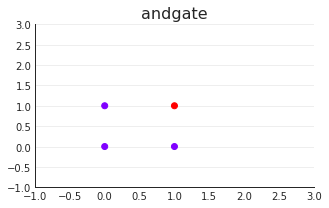

In [16]:
# 可以通过python中的matplotlib代码将数据可视化
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid') # 设置图像的风格
sns.set_style('white')
plt.figure(figsize=(5, 3)) # 设置画布大小
plt.title('andgate', fontsize=16) # 设置图像标题
plt.scatter(X[:, 1], X[:, 2], c=andgate, cmap='rainbow') # 绘制散点图
plt.xlim(-1, 3) # 设置横纵坐标尺寸
plt.ylim(-1, 3)
plt.grid(alpha=0.4, axis='y') # 显示背景中的网格
plt.gca().spines['top'].set_alpha(0.0) # 让上方和右侧的坐标轴被隐藏
plt.gca().spines['right'].set_alpha(0.0)

In [25]:
# 使用阶跃函数作为联系函数替代sigmoid来对与门数据进行分类
X = torch.tensor([[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=torch.float32)
andgate = torch.tensor([0, 0, 0, 1], dtype=torch.float32)

def AND(X, w):
  w = torch.tensor([-0.2,0.15, 0.15], dtype = torch.float32)
  zhat = torch.mv(X, w)
  andhat = torch.tensor([int(i) for i in zhat >= 0], dtype=torch.float32)
  return andhat

andhat = AND(X, w)
print(andhat)


tensor([0., 0., 0., 1.])


In [31]:
X = torch.tensor([[1, 0, 0], [1, 1, 0], [1, 0, 1], [1, 1, 1]], dtype=torch.float32)
orgate = torch.tensor([0, 1, 1, 1], dtype=torch.float32)

def orgate(X, w):
  w = torch.tensor([-0.08, 0.15, 0.15], dtype=torch.float32)
  zhat = torch.mv(X, w)
  orhat = torch.tensor([int(i) for i in zhat >= 0], dtype=torch.float32)
  return orhat

orhat = orgate(X, w)
print(orhat)

tensor([0., 1., 1., 1.])
